In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib widget

## 10 steps (Thursday - Saturday)

In [2]:
az_range_deg = np.linspace(-180.0, 180.0, 10)
el_range_deg = np.linspace(-180.0, 180.0, 10)

### Az first (Thursday, Friday)

In [3]:
el_pos = []
az_pos = []
az_axs = az_range_deg.copy()
for ev in el_range_deg:
    for av in az_axs:
        el_pos.append(ev)
        az_pos.append(av)
    az_axs = az_axs[::-1]

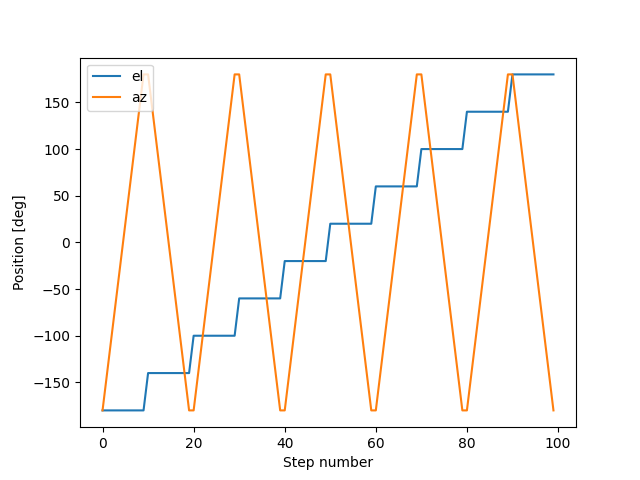

In [4]:
plt.figure()
plt.plot(el_pos, label="el")
plt.plot(az_pos, label="az")
plt.legend(loc="upper left")
plt.xlabel("Step number")
plt.ylabel("Position [deg]")
plt.show()

### El first (Saturday?)

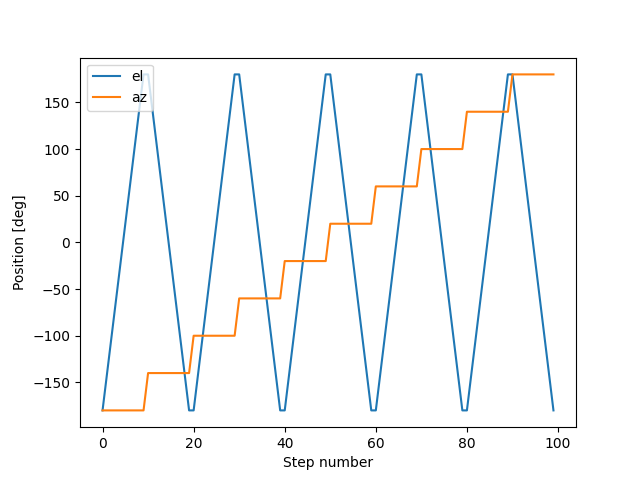

In [5]:
el_pos = []
az_pos = []
el_axs = el_range_deg.copy()
for av in az_range_deg:
    for ev in el_axs:
        el_pos.append(ev)
        az_pos.append(av)
    el_axs = el_axs[::-1]

plt.figure()
plt.plot(el_pos, label="el")
plt.plot(az_pos, label="az")
plt.legend(loc="upper left")
plt.xlabel("Step number")
plt.ylabel("Position [deg]")
plt.show()

## 72 steps (Sunday)

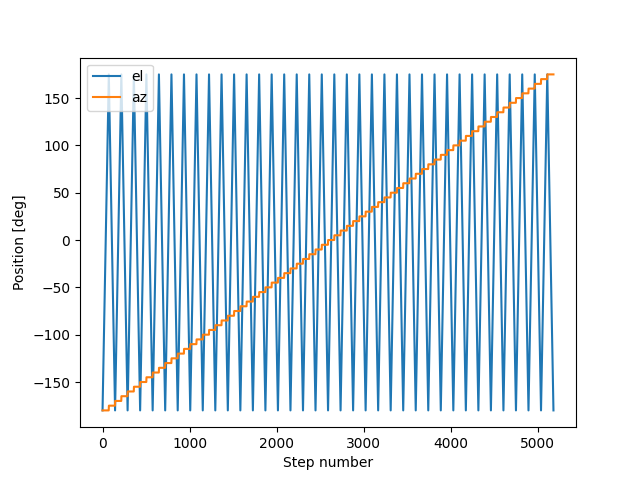

In [6]:
az_range_deg = np.linspace(-180.0, 180.0, 72, endpoint=False)
el_range_deg = np.linspace(-180.0, 180.0, 72, endpoint=False)


el_pos = []
az_pos = []
el_axs = el_range_deg.copy()
for av in az_range_deg:
    for ev in el_axs:
        el_pos.append(ev)
        az_pos.append(av)
    el_axs = el_axs[::-1]

plt.figure()
plt.plot(el_pos, label="el")
plt.plot(az_pos, label="az")
plt.legend(loc="upper left")
plt.xlabel("Step number")
plt.ylabel("Position [deg]")
plt.show()

## Time estimates

In [10]:
# delays (microseconds)
az_up_delay_us=2400
az_dn_delay_us=300
el_up_delay_us=2400
el_dn_delay_us=600

DEFAULT_DELAY_US = 600
SLOWDOWN_FACTOR = 2
SLOW_ZONE = 100

extra_delay_az = SLOWDOWN_FACTOR * az_dn_delay_us
extra_delay_el = SLOWDOWN_FACTOR * el_dn_delay_us

# sleeps up then (down + extra)
el_delay = el_up_delay_us + el_dn_delay_us + extra_delay_el
az_delay = az_up_delay_us + az_dn_delay_us + extra_delay_az

el_delay /= 1e6  # to seconds
az_delay /= 1e6

print(el_delay, az_delay)

0.0042 0.0033


In [28]:
# PLACEHOLDERS
# time per step in seconds
az_move_time = 1
el_move_time = 1

In [29]:
def calc_time(n_az, n_el, el_first=False):
    az_time = az_delay + az_move_time
    el_time = el_delay + el_move_time
    if el_first:
        return n_az * az_time + n_el * n_az * el_time
    else:
        return n_el * n_az * az_time + n_el * el_time

print(f"10x10 steps, az_first: {calc_time(10, 10, el_first=False) / 60} minutes")
print(f"10x10 steps, el_first: {calc_time(10, 10, el_first=True) / 60} minutes")
print(f"72x72 steps, el_first: {calc_time(72, 72, el_first=True) / 3600} hrs")

10x10 steps, az_first: 1.8395333333333335 minutes
10x10 steps, el_first: 1.8408833333333334 minutes
72x72 steps, el_first: 1.4661140000000001 hrs
